# Linear models
In this notebook I will try and implement linear regression for 2-dim data and some of it's basic implementations, such as: <br>
-LSM<br>
-Gradient descent<br>
-Stohastic Gradient descent<br>
-Gradient descent with momentum<br>
-Nesterov Accelerated Gradient descent<br>
-AdaGrad
-AdaDelta



@article {url = {https://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent}}

@article {url = {https://habr.com/ru/post/318970/}}

@article {url = {https://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent}}

### Step 1: generating data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0) # fix seed for reproducibility.

mean = [-1, 1] # mean of normal distribution. Try others.
cov = [[1, -0.8], 
       [-0.8, 1]] # covariance of normal distribution
sample = np.random.multivariate_normal(mean, cov, size=1000) # 1000 normally distributed samples

# TODO: compare with normalized normal distribution; also with other distributions; also add outliers

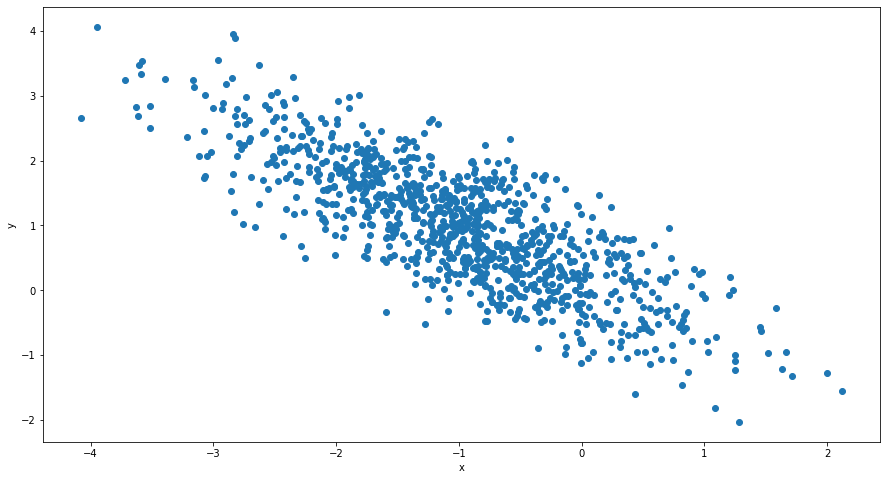

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
X = np.array([np.array([1, xi]) for xi in x])
X[:3], y[:3], X.shape, y.shape

(array([[ 1.        , -2.54698618],
        [ 1.        , -1.21987973],
        [ 1.        , -3.08076347]]),
 array([2.80006782, 2.63714503, 2.46267867]),
 (1000, 2),
 (1000,))

### Some basic functions

-prediction ( X, theta): $y = \theta^TX$ <br>
-MSE score (y, $\hat{y}$)

In [5]:
def predict(X, theta):
    return np.dot(X, theta)


In [6]:
def l2_score(y, y_hat):
    return sum((y - y_hat) ** 2) / (2 * len(y))


### Simple MSE
Note: This is an analytical algorhytm. Thought it finds the best solution, it's complexity is: O(n) = $(n^\theta) + n^{2.4} $

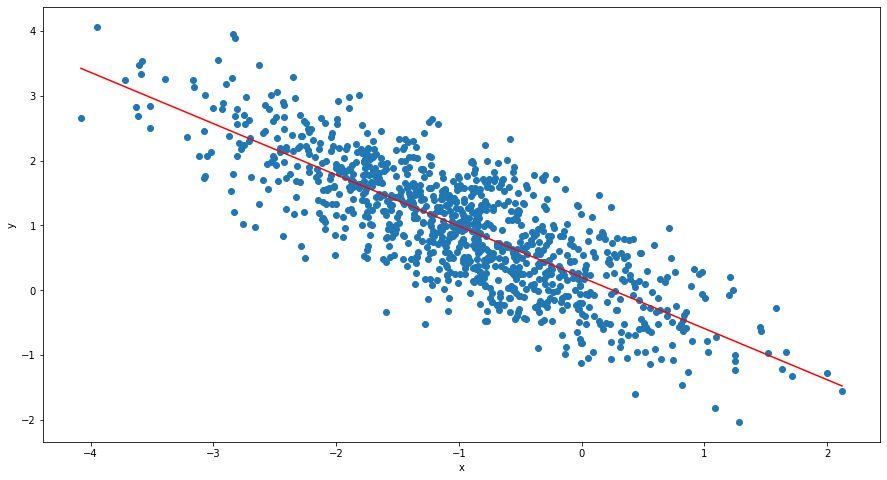

In [7]:
def MSE_weights(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T @ y)
theta_mse = MSE_weights(X, y)

#plot
edges = np.array([x.min(), x.max()])
line = theta_mse[0] + theta_mse[1] * edges
plt.plot(edges, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### MSE score
This is as good as it gets

In [8]:
prediction = predict(X, theta_mse)
l2_score(prediction, y)

0.17174532153204458

### Gradient descent
The main idea behind gradient descent is that we can easily find the direction of function's fastest decrease - Jacobian matrix transforms our space so that (1, 1, ..., 1) turns into the fector pointing to the fastest increase direction. We multiply it by -1 and get decrease.


$\theta = \theta + \alpha \nabla J(\theta)$

$\nabla J(\theta) = \sum_m(y - h_\theta(X))X$

Note: $ O(n) = i * n^3 $

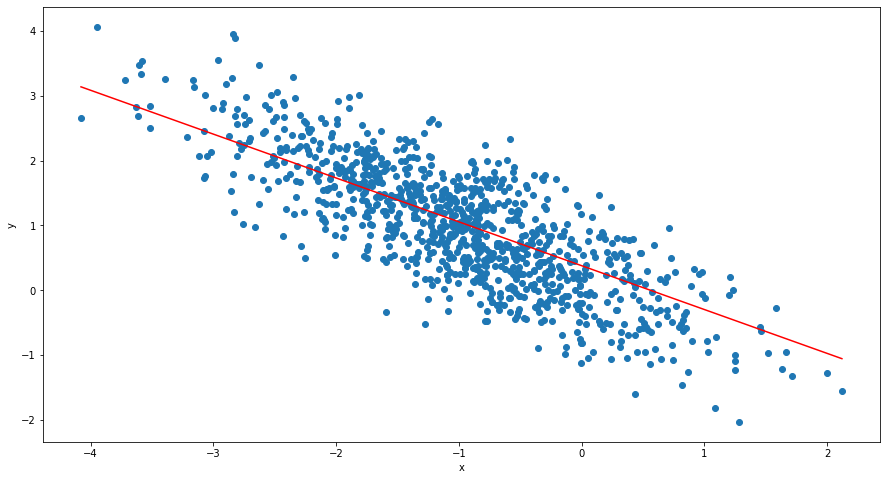

In [9]:
class GradientDescent:
    def __init__(self, X, y, l_rate=0.001, iters=100, starting_point=np.array([0]*2)):
        self.le_rate = l_rate
        self.iters = iters
        self.starting_point = starting_point
        self.X = X
        self.y = y
    
    def fit(self): 
        theta = np.array(self.starting_point) # init theta with any scalar or vector
        m = len(X)
        history = [theta] # list of theta values on each iteration 
        cost = [l2_score(y, predict(X, theta))] # list of cost function values on each iteration
    
        for i in range(self.iters):
            history.append(theta)
            cost.append(l2_score(y, predict(X, theta)))
            theta = theta + self.le_rate * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1)) # gradient descent itself, vectorized
            
            
        self.theta, self.cost, self.history = theta, np.array(cost), np.array(history)
        
    def predict(self):
        return self.theta, np.array(self.cost), np.array(self.history)


gd = GradientDescent(X, y, 0.0001, 100, [5, 10])
gd.fit()
gd_theta, gd_cost, gd_hishory = gd.predict()


extremes = np.array([np.min(x), np.max(x)])
line = gd_theta[0] + extremes * gd_theta[1]
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
prediction = predict(X, gd_theta)
l2_score(prediction, y)

0.18022190578623595

FOR FURTHER EXTENSIONS HERE

## Stohastic gradient

In [19]:
class StohasticGD:
    def __init__(self, X, y, le_rate, starting_point, iters=100, batch_size=1):
        self.X = X
        self.y = y
        self.le_rate = le_rate
        self.iters = iters
        self.starting_point = starting_point
        self.batch_size = batch_size
    
    
    def fit(self):
        theta = np.array(self.starting_point)
        history = []
        cost = []
        data = []
        
        for i in range(self.iters):
            history.append(theta)
            cost.append(l2_score(predict(self.X, theta), self.y))
            batch_indeces = np.random.choice(X.shape[0], size=self.batch_size, replace=False)
            data.append((self.X[batch_indeces][:,1], self.y[batch_indeces]))
            
            theta = theta + self.le_rate * (np.sum((y[batch_indeces] - np.dot(X[batch_indeces], theta.T))\
                                                   * X[batch_indeces].T, axis = 1))
            
        return theta, np.array(cost), np.array(history), np.array(data)

[ 0.2010682  -0.75904178]
0.17265632537588804


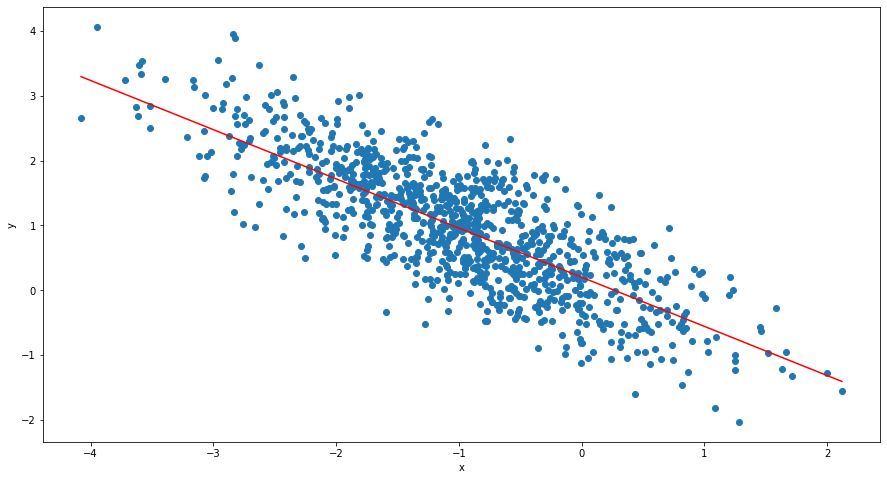

In [28]:
sgd = StohasticGD(X, y, 0.001, [5, 10], iters=10000, batch_size=5)
sgd_theta, sgd_cost, sgd_hishory, sgd_data = sgd.fit()
print(sgd_theta)

prediction = predict(X, sgd_theta)
score = l2_score(prediction, y)
print(score)

extremes = np.array([np.min(x), np.max(x)])
line = sgd_theta[0] + extremes * sgd_theta[1]
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Nesterov's gradient
$\theta_i = \theta_i - v_t $ <br>
$ v_t = \gamma v_{t-1} + \eta \bigtriangledown_\theta J(\theta)$ ,where $\eta = 1 - \gamma$ 